# Install Neccessary Pandas Libraries

In [1]:
!pip install mlxtend
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=651087690ed6dafa170551731acf1bbe87d8999796fbcbcd55126796ccaece25
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#Load Datasets

In [3]:
df = pd.read_csv('/content/Market Basket Analysis - Groceries_dataset (1).csv')
df.info()
df.describe()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


# Process data for Apiori Algorithm

In [20]:
# Convert all elements to strings before sorting
mixed_list = [10, "20", 5, "15"]
sorted_list = sorted(map(str, mixed_list))
print(df.head())
print(df.tail())
# Now the list is sorted without errors
print(sorted_list)
transactions = []
for idx, row in df.iterrows():
    transactions.append(row.dropna().astype(str).tolist())
print(transactions)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
       Member_number        Date        itemDescription
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food
['10', '15', '20', '5']
[['1808', '21-07-2015', 'tropical fruit'], ['2552', '05-01-2015', 'whole milk'], ['2300', '19-09-2015', 'pip fruit'], ['1187', '12-12-2015', 'other vegetables'], ['3037', '01-02-2015', 'whole milk'], ['4941', '14-02-2015', 'rolls/buns'], ['4501', '08-05-2015', 'other vegetables'], ['3803', '23-12-2015', 'pot plants'], ['2762', '20-03-2015', 'whole milk'], 

# Use TransactionEncoder to one-hot encode the data

In [19]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)
print(te)

TransactionEncoder()


# Apply Apriori algorithm to find frequent itemsets

In [15]:
min_support = 0.01
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
     support                 itemsets
0   0.013311                   (beef)
1   0.017722           (bottled beer)
2   0.024068          (bottled water)
3   0.014730            (brown bread)
4   0.013775                 (butter)
5   0.018496            (canned beer)
6   0.010886                (chicken)
7   0.020947           (citrus fruit)
8   0.012279                 (coffee)
9   0.013259                   (curd)
10  0.014601          (domestic eggs)
11  0.014962            (frankfurter)
12  0.010963      (frozen vegetables)
13  0.013363  (fruit/vegetable juice)
14  0.012666              (margarine)
15  0.015375             (newspapers)
16  0.048962       (other vegetables)
17  0.020250                 (pastry)
18  0.019193              (pip fruit)
19  0.014601                   (pork)
20  0.044267             (rolls/buns)
21  0.027628        (root vegetables)
22  0.023836                (sausage)
23  0.018857          (shopping bags)
24  0.039056                  

# Generate association rules

In [17]:
min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print("\nAssociation Rules:")
print(rules)
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)


Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Visualizing frequent itemsets

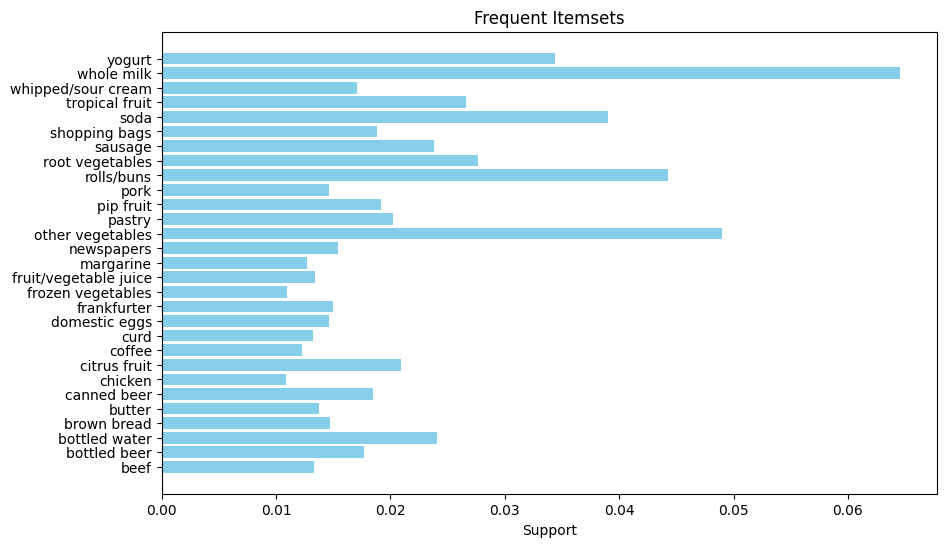

In [8]:
plt.figure(figsize=(10, 6))
support = frequent_itemsets['support']
itemsets = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(itemsets, support, color='skyblue')
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()

# Visualizing association rules using Plotly

In [9]:
fig = px.scatter(rules, x='support', y='confidence', color='lift', hover_data=['antecedents', 'consequents'])
fig.update_layout(title='Association Rules',
                  xaxis_title='Support',
                  yaxis_title='Confidence',
                  coloraxis_colorbar=dict(title='Lift'))
fig.show()

# Visualizing association rules using matplotlib (scatter plot)

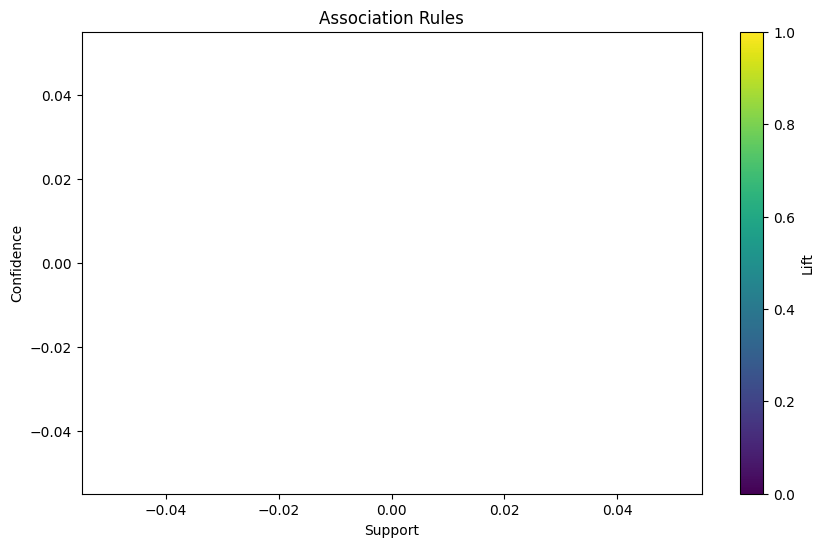

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


# Visualize frequent itemsets using Plotly (treemap)

In [12]:
fig = px.treemap(frequent_itemsets, path=['itemsets'], values='support', title='Frequent Itemsets')
fig.show()

 # Visualize frequent itemsets using seaborn (bar plot)

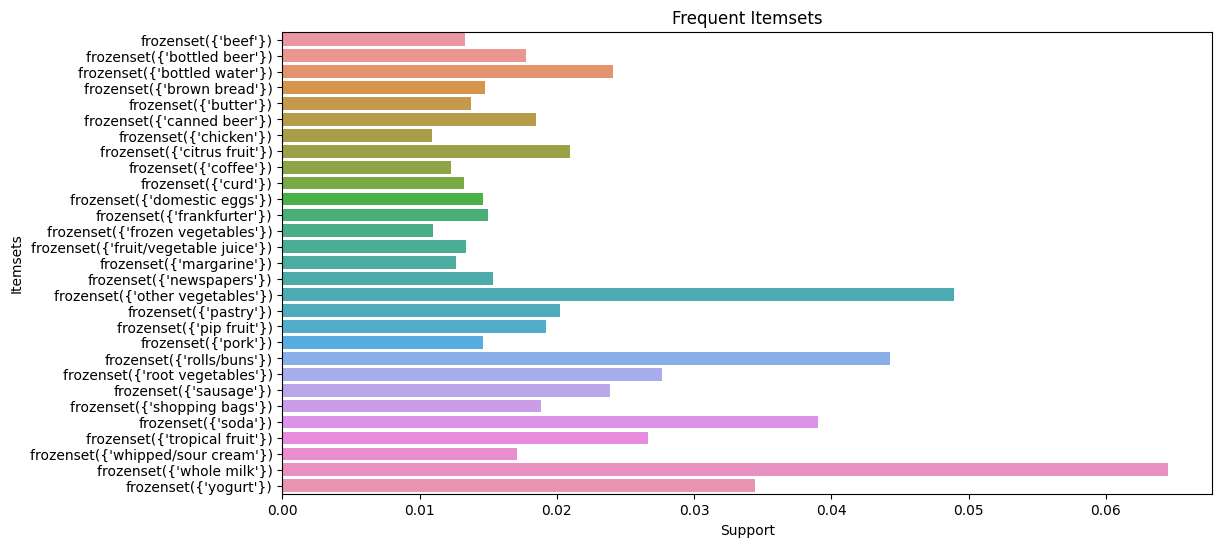

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.title('Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Show Date in Association with number items bought on that date

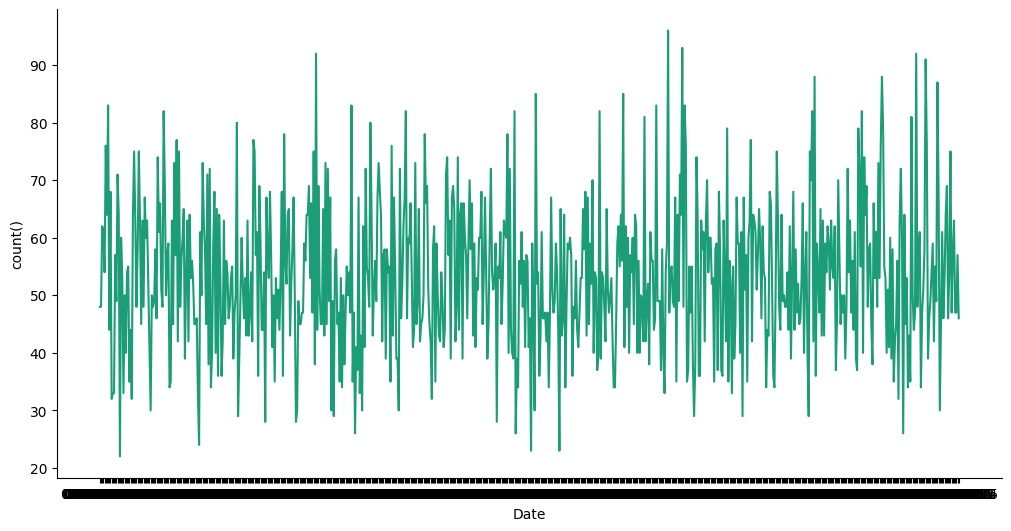

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')